# 环境配置

In [1]:
!git clone https://gitee.com/paddlepaddle/PaddleClas.git -b release/2.3

正克隆到 'PaddleClas'...
remote: Enumerating objects: 25293, done.
remote: Counting objects: 100% (5176/5176), done.
remote: Compressing objects: 100% (1840/1840), done.
remote: Total 25293 (delta 3636), reused 4691 (delta 3319), pack-reused 20117
接收对象中: 100% (25293/25293), 155.60 MiB | 10.41 MiB/s, 完成.
处理 delta 中: 100% (17421/17421), 完成.
检查连接... 完成。


安装依赖项

In [2]:
%cd PaddleClas/
!pip install -r requirements.txt

/home/aistudio/PaddleClas
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 MB 7.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 9.0 MB/s eta 0:00:00:00:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 11.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.1.26
    Uninstalling opencv-python-4.1.1.26:
      Successfully uninstalled opencv-python-4.1.1.26
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [7]:
%cd deploy

/home/aistudio/PaddleClas/deploy


# 数据与模型
## 下载、解压 inference 模型与 demo 数据

In [9]:
!mkdir models
%cd models
# 下载通用检测 inference 模型并解压
!wget https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/rec/models/inference/picodet_PPLCNet_x2_5_mainbody_lite_v1.0_infer.tar && tar -xf picodet_PPLCNet_x2_5_mainbody_lite_v1.0_infer.tar
# 下载识别 inference 模型并解压
!wget https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/rec/models/inference/general_PPLCNet_x2_5_lite_v1.0_infer.tar && tar -xf general_PPLCNet_x2_5_lite_v1.0_infer.tar
%cd ../
# 下载 demo 数据并解压
!wget https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/rec/data/drink_dataset_v1.0.tar && tar -xf drink_dataset_v1.0.tar

/home/aistudio/PaddleClas/deploy/models
--2022-04-13 10:00:58--  https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/rec/models/inference/picodet_PPLCNet_x2_5_mainbody_lite_v1.0_infer.tar
正在解析主机 paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)... 182.61.200.195, 182.61.200.229, 2409:8c04:1001:1002:0:ff:b001:368a
正在连接 paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)|182.61.200.195|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 30638080 (29M) [application/x-tar]
正在保存至: “picodet_PPLCNet_x2_5_mainbody_lite_v1.0_infer.tar”

picodet_PPLCNet_x2_ 100%[===================>]  29.22M  13.1MB/s    in 2.2s    

2022-04-13 10:01:00 (13.1 MB/s) - 已保存 “picodet_PPLCNet_x2_5_mainbody_lite_v1.0_infer.tar” [30638080/30638080])

--2022-04-13 10:01:01--  https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/rec/models/inference/general_PPLCNet_x2_5_lite_v1.0_infer.tar
正在解析主机 paddle-imagenet-models-name.bj.bcebos.com (paddle-i

# 图像识别与检索

## 单张图片识别
使用GPU识别

In [11]:
# 使用下面的命令使用 GPU 进行预测
!python3.7 python/predict_system.py -c configs/inference_general.yaml
# # 使用下面的命令使用 CPU 进行预测
# !python3.7 python/predict_system.py -c configs/inference_general.yaml -o Global.use_gpu=False

2022-04-13 10:05:48 INFO: 
==        PaddleClas is powered by PaddlePaddle !        ==
==                                                       ==
==   For more info please go to the following website.   ==
==                                                       ==
==       https://github.com/PaddlePaddle/PaddleClas      ==

2022-04-13 10:05:48 INFO: DetPostProcess : 
2022-04-13 10:05:48 INFO: DetPreProcess : 
2022-04-13 10:05:48 INFO:     transform_ops : 
2022-04-13 10:05:48 INFO:         DetResize : 
2022-04-13 10:05:48 INFO:             interp : 2
2022-04-13 10:05:48 INFO:             keep_ratio : False
2022-04-13 10:05:48 INFO:             target_size : [640, 640]
2022-04-13 10:05:48 INFO:         DetNormalizeImage : 
2022-04-13 10:05:48 INFO:             is_scale : True
2022-04-13 10:05:48 INFO:             mean : [0.485, 0.456, 0.406]
2022-04-13 10:05:48 INFO:             std : [0.229, 0.224, 0.225]
2022-04-13 10:05:48 INFO:         DetPermute : 
2022-04-13 10:05:48 INFO: Global

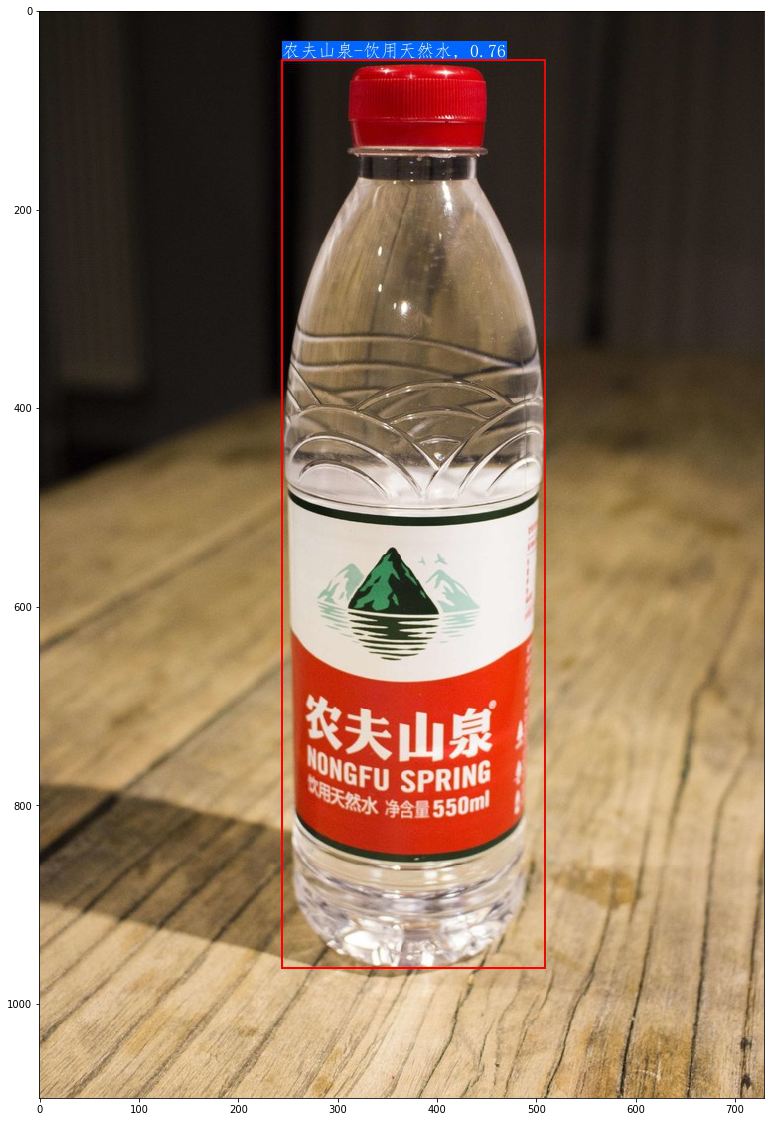

In [14]:
# 结果展示
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
img = mpimg.imread("output/nongfu_spring.jpeg")
plt.figure(figsize=(20,20))
plt.imshow(img) 
plt.show()

## 批量图片识别

In [15]:
!python3.7 python/predict_system.py -c configs/inference_general.yaml -o Global.infer_imgs="./drink_dataset_v1.0/test_images/"

2022-04-13 10:08:29 INFO: 
==        PaddleClas is powered by PaddlePaddle !        ==
==                                                       ==
==   For more info please go to the following website.   ==
==                                                       ==
==       https://github.com/PaddlePaddle/PaddleClas      ==

2022-04-13 10:08:29 INFO: DetPostProcess : 
2022-04-13 10:08:29 INFO: DetPreProcess : 
2022-04-13 10:08:29 INFO:     transform_ops : 
2022-04-13 10:08:29 INFO:         DetResize : 
2022-04-13 10:08:29 INFO:             interp : 2
2022-04-13 10:08:29 INFO:             keep_ratio : False
2022-04-13 10:08:29 INFO:             target_size : [640, 640]
2022-04-13 10:08:29 INFO:         DetNormalizeImage : 
2022-04-13 10:08:29 INFO:             is_scale : True
2022-04-13 10:08:29 INFO:             mean : [0.485, 0.456, 0.406]
2022-04-13 10:08:29 INFO:             std : [0.229, 0.224, 0.225]
2022-04-13 10:08:29 INFO:         DetPermute : 
2022-04-13 10:08:29 INFO: Global

结果示意：
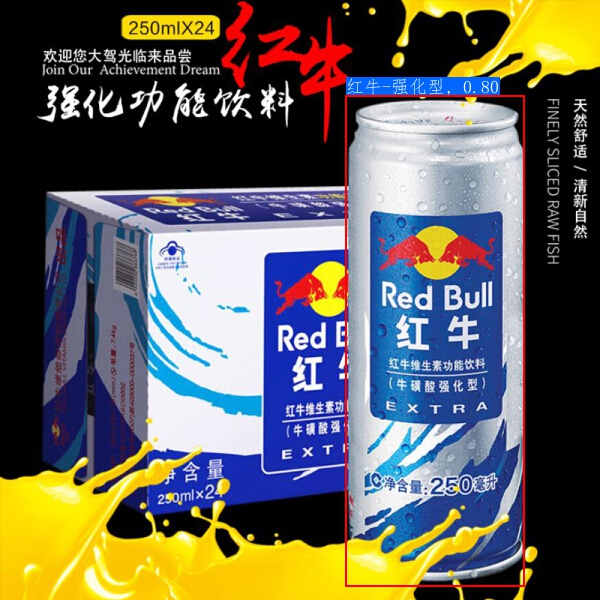

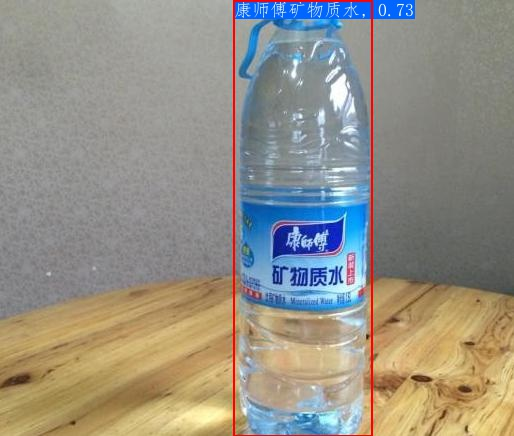

## 未知类别图片识别

In [17]:
# 建立新的索引库
!python3.7 python/build_gallery.py -c configs/inference_general.yaml -o IndexProcess.data_file="./drink_dataset_v1.0/gallery/drink_label_all.txt" -o IndexProcess.index_dir="./drink_dataset_v1.0/index_all"

2022-04-13 10:12:14 INFO: 
==        PaddleClas is powered by PaddlePaddle !        ==
==                                                       ==
==   For more info please go to the following website.   ==
==                                                       ==
==       https://github.com/PaddlePaddle/PaddleClas      ==

2022-04-13 10:12:14 INFO: DetPostProcess : 
2022-04-13 10:12:14 INFO: DetPreProcess : 
2022-04-13 10:12:14 INFO:     transform_ops : 
2022-04-13 10:12:14 INFO:         DetResize : 
2022-04-13 10:12:14 INFO:             interp : 2
2022-04-13 10:12:14 INFO:             keep_ratio : False
2022-04-13 10:12:14 INFO:             target_size : [640, 640]
2022-04-13 10:12:14 INFO:         DetNormalizeImage : 
2022-04-13 10:12:14 INFO:             is_scale : True
2022-04-13 10:12:14 INFO:             mean : [0.485, 0.456, 0.406]
2022-04-13 10:12:14 INFO:             std : [0.229, 0.224, 0.225]
2022-04-13 10:12:14 INFO:         DetPermute : 
2022-04-13 10:12:14 INFO: Global

In [18]:
!python3.7 python/predict_system.py -c configs/inference_general.yaml -o Global.infer_imgs="././drink_dataset_v1.0/test_images/mosilian.jpeg" -o IndexProcess.index_dir="./drink_dataset_v1.0/index_all"

2022-04-13 10:12:47 INFO: 
==        PaddleClas is powered by PaddlePaddle !        ==
==                                                       ==
==   For more info please go to the following website.   ==
==                                                       ==
==       https://github.com/PaddlePaddle/PaddleClas      ==

2022-04-13 10:12:47 INFO: DetPostProcess : 
2022-04-13 10:12:47 INFO: DetPreProcess : 
2022-04-13 10:12:47 INFO:     transform_ops : 
2022-04-13 10:12:47 INFO:         DetResize : 
2022-04-13 10:12:47 INFO:             interp : 2
2022-04-13 10:12:47 INFO:             keep_ratio : False
2022-04-13 10:12:47 INFO:             target_size : [640, 640]
2022-04-13 10:12:47 INFO:         DetNormalizeImage : 
2022-04-13 10:12:47 INFO:             is_scale : True
2022-04-13 10:12:47 INFO:             mean : [0.485, 0.456, 0.406]
2022-04-13 10:12:47 INFO:             std : [0.229, 0.224, 0.225]
2022-04-13 10:12:47 INFO:         DetPermute : 
2022-04-13 10:12:47 INFO: Global

结果如下：
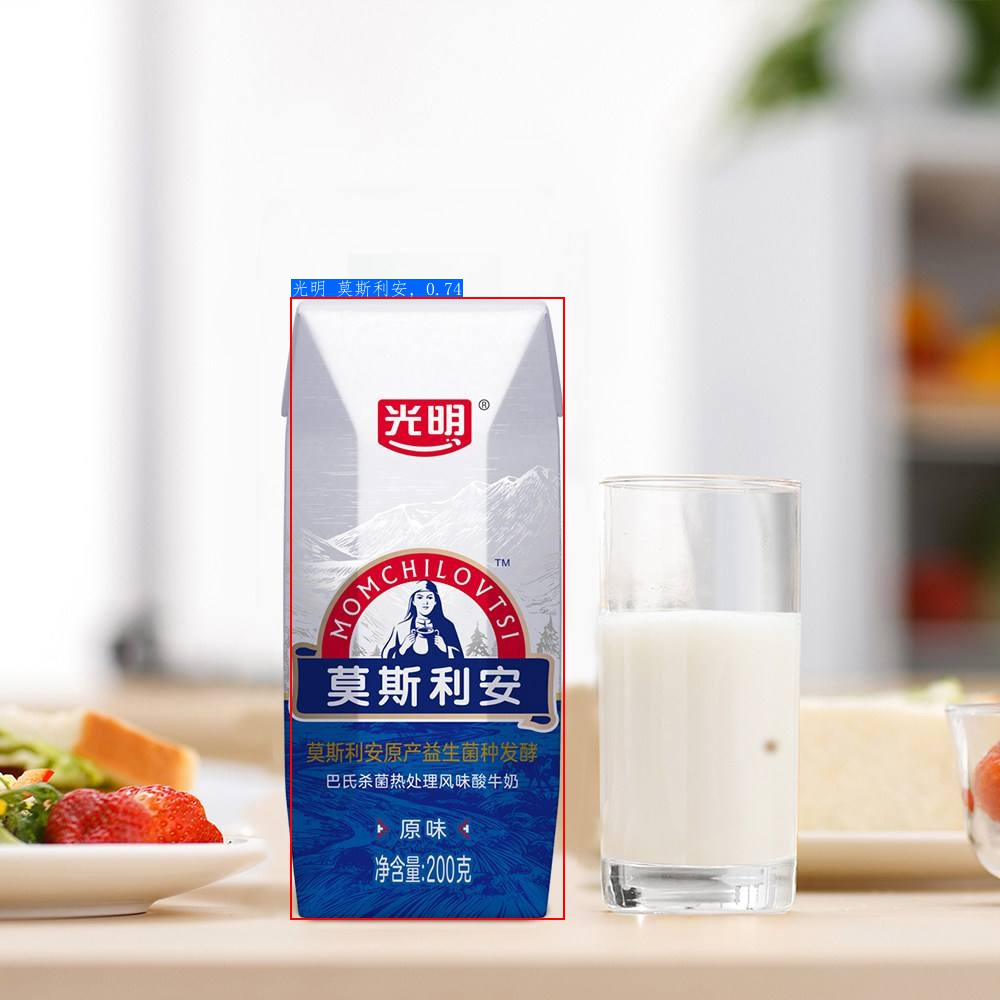